# Analyse crime patterns based upon available data

## API / Dataset

### City of Los Angeles Open Data

Leveraging data set made available by the City of Los Angeles to gain some insights into well published crime in the City of Los Angeles.

Per the City of Los Angeles open data set description:

<b>Crime Data from 2010 to Present</b>

This dataset reflects incidents of crime in the City of Los Angeles dating back to 2010. This data is transcribed from original crime reports that are typed on paper and therefore there may be some inaccuracies within the data. Some location fields with missing data are noted as (0°, 0°). Address fields are only provided to the nearest hundred block in order to maintain privacy. This data is as accurate as the data in the database. 

https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-Present/y8tr-7khq

### Library uszipcode

Use of publicly available library to reverse geocode the latitude and longitude coordinates to a zip code.

### Library gmaps
Use of publicly available library to visualize geographical data through google maps.

### Alternative Data Retrieval
Given the large data set and long API retrieval time, two alternative data retrievals were used.
#### Pickle
Pickle serializes the data stream (in our case, the dataframe with data retrieved from API), and allows you to de-serialize the data stream at a later time for processing.
#### CSV
CSV downloads the data from the dataframe, and allows for further processing at a later time. This scenario is active (non commented out) in the notebook. Other scenarios can be activated by uncommenting.

In [4]:
%matplotlib inline
import pandas as pd
from sodapy import Socrata
from uszipcode import SearchEngine # note this does an approximation of zipcode based upon a radius
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from numpy import median
import gmaps
import gmaps.datasets
# import pickle

In [5]:
pd.options.display.max_columns=30

### City of Los Angeles Open Data

In [6]:
# client = Socrata("data.lacity.org", None)

# results = client.get("7fvc-faax", limit=2000000)
# # results = client.get("7fvc-faax", limit=200)

# # Convert to pandas DataFrame
# results_df = pd.DataFrame.from_records(results)

In [7]:
# results_df.head()

### Alternative Data Retrieval
#### Pickle

In [8]:
# with open('results_df.pickle', 'wb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     pickle.dump(results_df, f, pickle.HIGHEST_PROTOCOL)

In [9]:
# with open('results_df.pickle', 'rb') as f:
#     # The protocol version used is detected automatically, so we do not
#     # have to specify it.
#     results_df = pickle.load(f)

In [10]:
# list(results_df)

In [11]:
# results_df.head()

In [12]:
# results_df['zipcode']=pd.to_numeric(results_df.zipcode)
# results_df['year']=pd.to_numeric(results_df.year)
# results_df['crm_cd']=pd.to_numeric(results_df.crm_cd)

#### CSV

In [13]:
# # in case you want to keep run the data from the cvs file instead of the api
# file_name='Resources\los_angeles_crime_statistics.csv'
# results_df.to_csv(file_name, encoding='utf-8')

In [14]:
# if you have the csv file available and want to pull the data from the csv file, uncomment next line
results_df=pd.read_csv('Resources\los_angeles_crime_statistics.csv')

In [15]:
# Read income and housing data by zipcode csv file
zip_home_income=pd.read_csv('Resources\CA_zip_home_income.csv')
zip_home_income.head()

,Median Home Value,Median Household Income,Zip Code
0,249600.0,35097.0,90001
1,216100.0,31258.0,90002
2,231700.0,29686.0,90003
3,776300.0,37976.0,90004
4,633600.0,31893.0,90005


## Cleanup and Additional Data

In [16]:
# Rename Zip Code column to zipcode
zip_home_income=zip_home_income.rename(columns = {"Zip Code":"zipcode"})
zip_home_income.head()

,Median Home Value,Median Household Income,zipcode
0,249600.0,35097.0,90001
1,216100.0,31258.0,90002
2,231700.0,29686.0,90003
3,776300.0,37976.0,90004
4,633600.0,31893.0,90005


In [17]:
# remove lines with no corresponding zip code
results_df = results_df[results_df.zipcode != 0]
len(results_df)

1930536

In [18]:
# Join crime data, income and housing data on zipcode
results_merged = pd.merge(results_df,zip_home_income,on=["zipcode"], how = "left")

In [19]:
results_merged.head()

,Unnamed: 0,area_id,area_name,crm_cd,crm_cd_desc,date_occ,date_rptd,dr_no,location,location_1,mocodes,premis_cd,premis_desc,rpt_dist_no,status,status_desc,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd,lat,lon,zipcode,year,Median Home Value,Median Household Income
0,0,7.0,Wilshire,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-12T00:00:00.000,2010-03-12T00:00:00.000,100700660,7600 BEVERLY BL,"{'type': 'Point', 'coordinates': [-118.3555, 3...",0421,109.0,PARK/PLAYGROUND,724,AA,Adult Arrest,1050,41.0,B,M,VERBAL THREAT,511.0,34.0761,-118.3555,90036,2010,945000.0,71589.0
1,1,7.0,Wilshire,626,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-13T00:00:00.000,2010-03-13T00:00:00.000,100700661,600 S DETROIT ST,"{'type': 'Point', 'coordinates': [-118.3451, 3...",0400 2000,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",735,AA,Adult Arrest,600,27.0,O,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0649,-118.3451,90036,2010,945000.0,71589.0
2,2,7.0,Wilshire,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-23T00:00:00.000,2010-03-24T00:00:00.000,100700688,LA CIENEGA BL,"{'type': 'Point', 'coordinates': [-118.3765, 3...",0400 0416 0421 1402,108.0,PARKING LOT,721,AA,Adult Arrest,2350,20.0,H,F,VERBAL THREAT,511.0,34.0730,-118.3765,90048,2010,941100.0,72701.0
3,3,7.0,Wilshire,626,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-23T00:00:00.000,2010-03-24T00:00:00.000,100700689,1100 NORTON AV,"{'type': 'Point', 'coordinates': [-118.3219, 3...",0400 0416 2000,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",759,AA,Adult Arrest,2330,35.0,O,M,UNKNOWN WEAPON/OTHER WEAPON,500.0,34.0516,-118.3219,90005,2010,633600.0,31893.0
4,4,7.0,Wilshire,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,2010-04-05T00:00:00.000,2010-04-05T00:00:00.000,100700719,4400 W WASHINGTON BL,"{'type': 'Point', 'coordinates': [-118.3353, 3...",0400 0416 2000,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",787,AO,Adult Other,2000,43.0,K,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0399,-118.3353,90019,2010,617300.0,42043.0


In [20]:
results_df = results_merged

## News validation: Issues

The analysis can only be as good as the underlying data

https://www.latimes.com/local/crime/la-me-lapd-audit-20151206-story.html

Crime classifications, the good, the bad and the ugly
- Modernizing Crime Statistics: Report 1: Defining and Classifying Crime (2016)
- Chapter: 5 Proposed Classification of Crime for Statistical Purposes
- https://www.nap.edu/read/23492/chapter/7#121

In [21]:
# get all crime codes with description and validate it is a one to one code versus description
aggregation = { 
     'crm_cd_desc': 'nunique' 
}
crime_codes = results_df.groupby(['crm_cd','crm_cd_desc']).agg(aggregation)

#crime_codes.to_csv('crime codes.csv', encoding='utf-8')
# manual determination of violent crime as no indicator available to determine violent crime.
# The LA Times article describes violent crime as 'violent crime — which includes homicide, rape, robbery and aggravated assault'.
crime_codes

,,crm_cd_desc
crm_cd,crm_cd_desc,
110,CRIMINAL HOMICIDE,1
113,"MANSLAUGHTER, NEGLIGENT",1
121,"RAPE, FORCIBLE",1
122,"RAPE, ATTEMPTED",1
210,ROBBERY,1
220,ATTEMPTED ROBBERY,1
230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1
231,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,1
235,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,1


## Overall Crime by Zip Code

In [22]:
# remove 2019
processing_df = results_df.loc[results_df['year'] != 2019]

years = processing_df.year.unique()
years.sort
years

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [23]:
processing_df.head()

,Unnamed: 0,area_id,area_name,crm_cd,crm_cd_desc,date_occ,date_rptd,dr_no,location,location_1,mocodes,premis_cd,premis_desc,rpt_dist_no,status,status_desc,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd,lat,lon,zipcode,year,Median Home Value,Median Household Income
0,0,7.0,Wilshire,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-12T00:00:00.000,2010-03-12T00:00:00.000,100700660,7600 BEVERLY BL,"{'type': 'Point', 'coordinates': [-118.3555, 3...",0421,109.0,PARK/PLAYGROUND,724,AA,Adult Arrest,1050,41.0,B,M,VERBAL THREAT,511.0,34.0761,-118.3555,90036,2010,945000.0,71589.0
1,1,7.0,Wilshire,626,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-13T00:00:00.000,2010-03-13T00:00:00.000,100700661,600 S DETROIT ST,"{'type': 'Point', 'coordinates': [-118.3451, 3...",0400 2000,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",735,AA,Adult Arrest,600,27.0,O,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0649,-118.3451,90036,2010,945000.0,71589.0
2,2,7.0,Wilshire,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-23T00:00:00.000,2010-03-24T00:00:00.000,100700688,LA CIENEGA BL,"{'type': 'Point', 'coordinates': [-118.3765, 3...",0400 0416 0421 1402,108.0,PARKING LOT,721,AA,Adult Arrest,2350,20.0,H,F,VERBAL THREAT,511.0,34.0730,-118.3765,90048,2010,941100.0,72701.0
3,3,7.0,Wilshire,626,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-23T00:00:00.000,2010-03-24T00:00:00.000,100700689,1100 NORTON AV,"{'type': 'Point', 'coordinates': [-118.3219, 3...",0400 0416 2000,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",759,AA,Adult Arrest,2330,35.0,O,M,UNKNOWN WEAPON/OTHER WEAPON,500.0,34.0516,-118.3219,90005,2010,633600.0,31893.0
4,4,7.0,Wilshire,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,2010-04-05T00:00:00.000,2010-04-05T00:00:00.000,100700719,4400 W WASHINGTON BL,"{'type': 'Point', 'coordinates': [-118.3353, 3...",0400 0416 2000,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",787,AO,Adult Other,2000,43.0,K,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0399,-118.3353,90019,2010,617300.0,42043.0


In [24]:
# group by year / zipcode ; count number of crimes (dr_no)
zip_crime_intermediate = processing_df.sort_values(by=['zipcode'])
aggregation = { 
     'dr_no': 'count' 
}
zip_crime = zip_crime_intermediate.groupby(['zipcode']).agg(aggregation)
zip_crime = zip_crime.sort_values(by=['dr_no'], ascending=False)
zip_crime.reset_index(level=0, inplace=True)
zip_crime.head()

,zipcode,dr_no
0,90037,56234
1,90003,50984
2,90028,50792
3,90011,43418
4,90057,42240


In [25]:
zip_crime_top = zip_crime[:5]
zip_crime_top

,zipcode,dr_no
0,90037,56234
1,90003,50984
2,90028,50792
3,90011,43418
4,90057,42240


In [26]:
zip_crime.tail()

,zipcode,dr_no
229,91104,1
230,91105,1
231,91207,1
232,91354,1
233,93591,1


In [27]:
type(zip_crime.zipcode[0])

numpy.int64

In [28]:
# get top into array to process zipcodes for line plot
zip_top = zip_crime_top.zipcode.unique()
zip_top

array([90037, 90003, 90028, 90011, 90057], dtype=int64)

In [29]:
aggregation = { 
     'dr_no': 'nunique' 
}

zip_90037 = processing_df[processing_df.zipcode == 90037].groupby(['year','zipcode']).agg(aggregation)
zip_90003 = processing_df[processing_df.zipcode == 90003].groupby(['year','zipcode']).agg(aggregation)
zip_90028 = processing_df[processing_df.zipcode == 90028].groupby(['year','zipcode']).agg(aggregation)
zip_90011 = processing_df[processing_df.zipcode == 90011].groupby(['year','zipcode']).agg(aggregation)
zip_90057 = processing_df[processing_df.zipcode == 90057].groupby(['year','zipcode']).agg(aggregation)

# top_zips={zipcode:pd.DataFrame(processing_df[processing_df.type == zipcode].groupby(['year']).agg(aggregation)) for zipcode in zip_top} # works

In [30]:
zip_90037.reset_index(level=0, inplace=True)
zip_90003.reset_index(level=0, inplace=True)
zip_90028.reset_index(level=0, inplace=True)
zip_90011.reset_index(level=0, inplace=True)
zip_90057.reset_index(level=0, inplace=True)

# top_zips.reset_index(level=0, inplace=True)

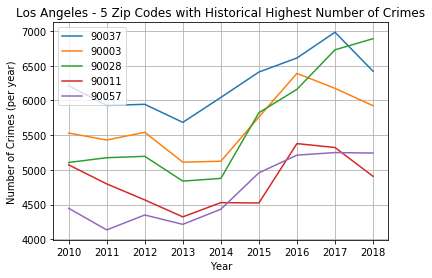

In [31]:
# plot lines
plot_90037 = plt.plot(zip_90037['year'],zip_90037['dr_no'],label=90037)
plot_90003 = plt.plot(zip_90003['year'],zip_90003['dr_no'],label=90003)
plot_90028 = plt.plot(zip_90028['year'],zip_90028['dr_no'],label=90028)
plot_90011 = plt.plot(zip_90011['year'],zip_90011['dr_no'],label=90011)
plot_90057 = plt.plot(zip_90057['year'],zip_90057['dr_no'],label=90057)
# plot layout
plt.xlabel('Year')
plt.ylabel('Number of Crimes (per year)')
plt.title('Los Angeles - 5 Zip Codes with Historical Highest Number of Crimes')
plt.legend()
plt.grid(b=None, which='major', axis='both')
# save plot
plt.savefig("Images/Los Angeles - 5 Zip Codes with Historical Highest Number of Violent Crimes.png")
# show plot
plt.show()

### Chart review:
- disproportionate increase for zip code 90028
- 2018 from the top 5 crime perspective shows a general decrease of crime

## Overall Violent Crime

In [32]:
# per initial list review with team member with history in law enforcement
violent_crime_list = [ 110, 113,121,122,210,220,230,231,235,236,250,251,434,435,436,451,753,821,860,910,920]
# type(violent_crime)

In [33]:
violent_crime_df = results_df[results_df["crm_cd"].isin(violent_crime_list)]
# remove 2019
violent_crime_df = violent_crime_df.loc[violent_crime_df['year'] != 2019]
violent_crime_df

,Unnamed: 0,area_id,area_name,crm_cd,crm_cd_desc,date_occ,date_rptd,dr_no,location,location_1,mocodes,premis_cd,premis_desc,rpt_dist_no,status,status_desc,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd,lat,lon,zipcode,year,Median Home Value,Median Household Income
4,4,7.0,Wilshire,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,2010-04-05T00:00:00.000,2010-04-05T00:00:00.000,100700719,4400 W WASHINGTON BL,"{'type': 'Point', 'coordinates': [-118.3353, 3...",0400 0416 2000,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",787,AO,Adult Other,2000,43.0,K,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0399,-118.3353,90019,2010,617300.0,42043.0
5,5,7.0,Wilshire,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,2010-04-05T00:00:00.000,2010-04-05T00:00:00.000,100700720,4400 W WASHINGTON BL,"{'type': 'Point', 'coordinates': [-118.3353, 3...",0416 2000,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",787,AO,Adult Other,2000,44.0,H,M,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0399,-118.3353,90019,2010,617300.0,42043.0
6,6,7.0,Wilshire,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-04-12T00:00:00.000,2010-04-12T00:00:00.000,100700734,CLOVERDALE AV,"{'type': 'Point', 'coordinates': [-118.3462, 3...",0400 0416 0417,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),737,AO,Adult Other,155,24.0,O,M,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0623,-118.3462,90036,2010,945000.0,71589.0
14,14,7.0,Wilshire,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-06-27T00:00:00.000,2010-06-27T00:00:00.000,100700892,1600 S HIGHLAND AV,"{'type': 'Point', 'coordinates': [-118.3441, 3...",0400 1402,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",774,AA,Adult Arrest,410,31.0,B,F,KNIFE WITH BLADE 6INCHES OR LESS,200.0,34.0461,-118.3441,90019,2010,617300.0,42043.0
15,15,7.0,Wilshire,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-07-01T00:00:00.000,2010-07-01T00:00:00.000,100700898,4800 W WASHINGTON BL,"{'type': 'Point', 'coordinates': [-118.3435, 3...",0416 1402 1810,510.0,NURSING/CONVALESCENT/RETIREMENT HOME,785,AO,Adult Other,715,63.0,W,M,STICK,308.0,34.0399,-118.3435,90019,2010,617300.0,42043.0
16,16,7.0,Wilshire,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-07-02T00:00:00.000,2010-07-02T00:00:00.000,100700902,WASHINGTON,"{'type': 'Point', 'coordinates': [-118.3398, 3...",0302 1100 1310 1414,101.0,STREET,776,AO,Adult Other,200,39.0,O,M,HAND GUN,102.0,34.0399,-118.3398,90019,2010,617300.0,42043.0
19,19,7.0,Wilshire,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-07-15T00:00:00.000,2010-07-15T00:00:00.000,100700936,1500 MEADOWBROOK AV,"{'type': 'Point', 'coordinates': [-118.351, 34...",0416 1402,501.0,SINGLE FAMILY DWELLING,764,AA,Adult Arrest,2315,61.0,W,M,UNKNOWN WEAPON/OTHER WEAPON,500.0,34.0465,-118.3510,90019,2010,617300.0,42043.0
21,21,7.0,Wilshire,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-05-13T00:00:00.000,2010-08-05T00:00:00.000,100700987,4000 W JOHNNIE COCH AV,"{'type': 'Point', 'coordinates': [-118.3269, 3...",0400 0417,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",778,AA,Adult Arrest,2100,39.0,H,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0418,-118.3269,90018,2010,345800.0,32447.0
22,22,7.0,Wilshire,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-08-19T00:00:00.000,2010-08-19T00:00:00.000,100701019,700 N LA CIENEGA BL,"{'type': 'Point', 'coordinates': [-118.3765, 3...",0400 0416 0906,207.0,BAR/COCKTAIL/NIGHTCLUB,701,AA,Adult Arrest,145,21.0,W,M,BOTTLE,212.0,34.0842,-118.3765,90069,2010,696700.0,75451.0
23,23,7.0,Wilshire,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,2010-08-20T00:00:00.000,2010-08-20T00:00:00.000,100701021,400 N ROSSMORE AV,"{'type': 'Point', 'coordinates': [-118.3273, 3...",0416 2000,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",719,AA,Adult Arrest,115,33.0,W,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0776,-118.3273,90038,2010,525800.0,35144.0


In [34]:
# group by violent crime 
violent_crime_desc_list_intermediate = violent_crime_df.sort_values(by=["crm_cd_desc"])
aggregation = { 
     'dr_no': 'count' 
}
violent_crime_desc_list = violent_crime_desc_list_intermediate.groupby(["crm_cd_desc"]).agg(aggregation)
violent_crime_desc_list = violent_crime_desc_list.sort_values(by=["dr_no"], ascending=False)
violent_crime_desc_list.reset_index(level=0, inplace=True)
violent_crime_desc_list = violent_crime_desc_list.head()
violent_crime_desc_list = violent_crime_desc_list.replace(',', '', regex=True)
violent_crime_desc_list = violent_crime_desc_list.replace('-', '', regex=True)
violent_crime_desc_list = violent_crime_desc_list.replace(' ', '_', regex=True)
violent_crime_desc_list = violent_crime_desc_list.replace('__', '_', regex=True)
violent_crime_desc_list


,crm_cd_desc,dr_no
0,ASSAULT_WITH_DEADLY_WEAPON_AGGRAVATED_ASSAULT,81836
1,ROBBERY,75377
2,INTIMATE_PARTNER_AGGRAVATED_ASSAULT,12440
3,ATTEMPTED_ROBBERY,10780
4,BATTERY_WITH_SEXUAL_CONTACT,9966


In [35]:
# group by year / zipcode ; count number of crimes (dr_no)
zip_crime_v_intermediate = violent_crime_df.sort_values(by=['zipcode'])
aggregation = { 
     'dr_no': 'count' 
}
zip_crime_v = zip_crime_v_intermediate.groupby(['zipcode']).agg(aggregation)
zip_crime_v = zip_crime_v.sort_values(by=['dr_no'], ascending=False)
zip_crime_v.reset_index(level=0, inplace=True)
zip_crime_v.head()

,zipcode,dr_no
0,90037,11300
1,90003,9915
2,90011,8158
3,90057,7610
4,90062,7387


In [36]:
len(zip_crime_v)

169

In [37]:
zip_crime_top_v = zip_crime_v[:5]
zip_crime_top_v

,zipcode,dr_no
0,90037,11300
1,90003,9915
2,90011,8158
3,90057,7610
4,90062,7387


In [38]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
#Join together a single string of crime description
crime_type_desc = " ".join(crimedesc for crimedesc in results_df["crm_cd_desc"])
# #Create and generate a word cloud image
crime_desc_wordcloud_transparent = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(crime_type_desc)
crime_desc_wordcloud_black = WordCloud().generate(crime_type_desc)

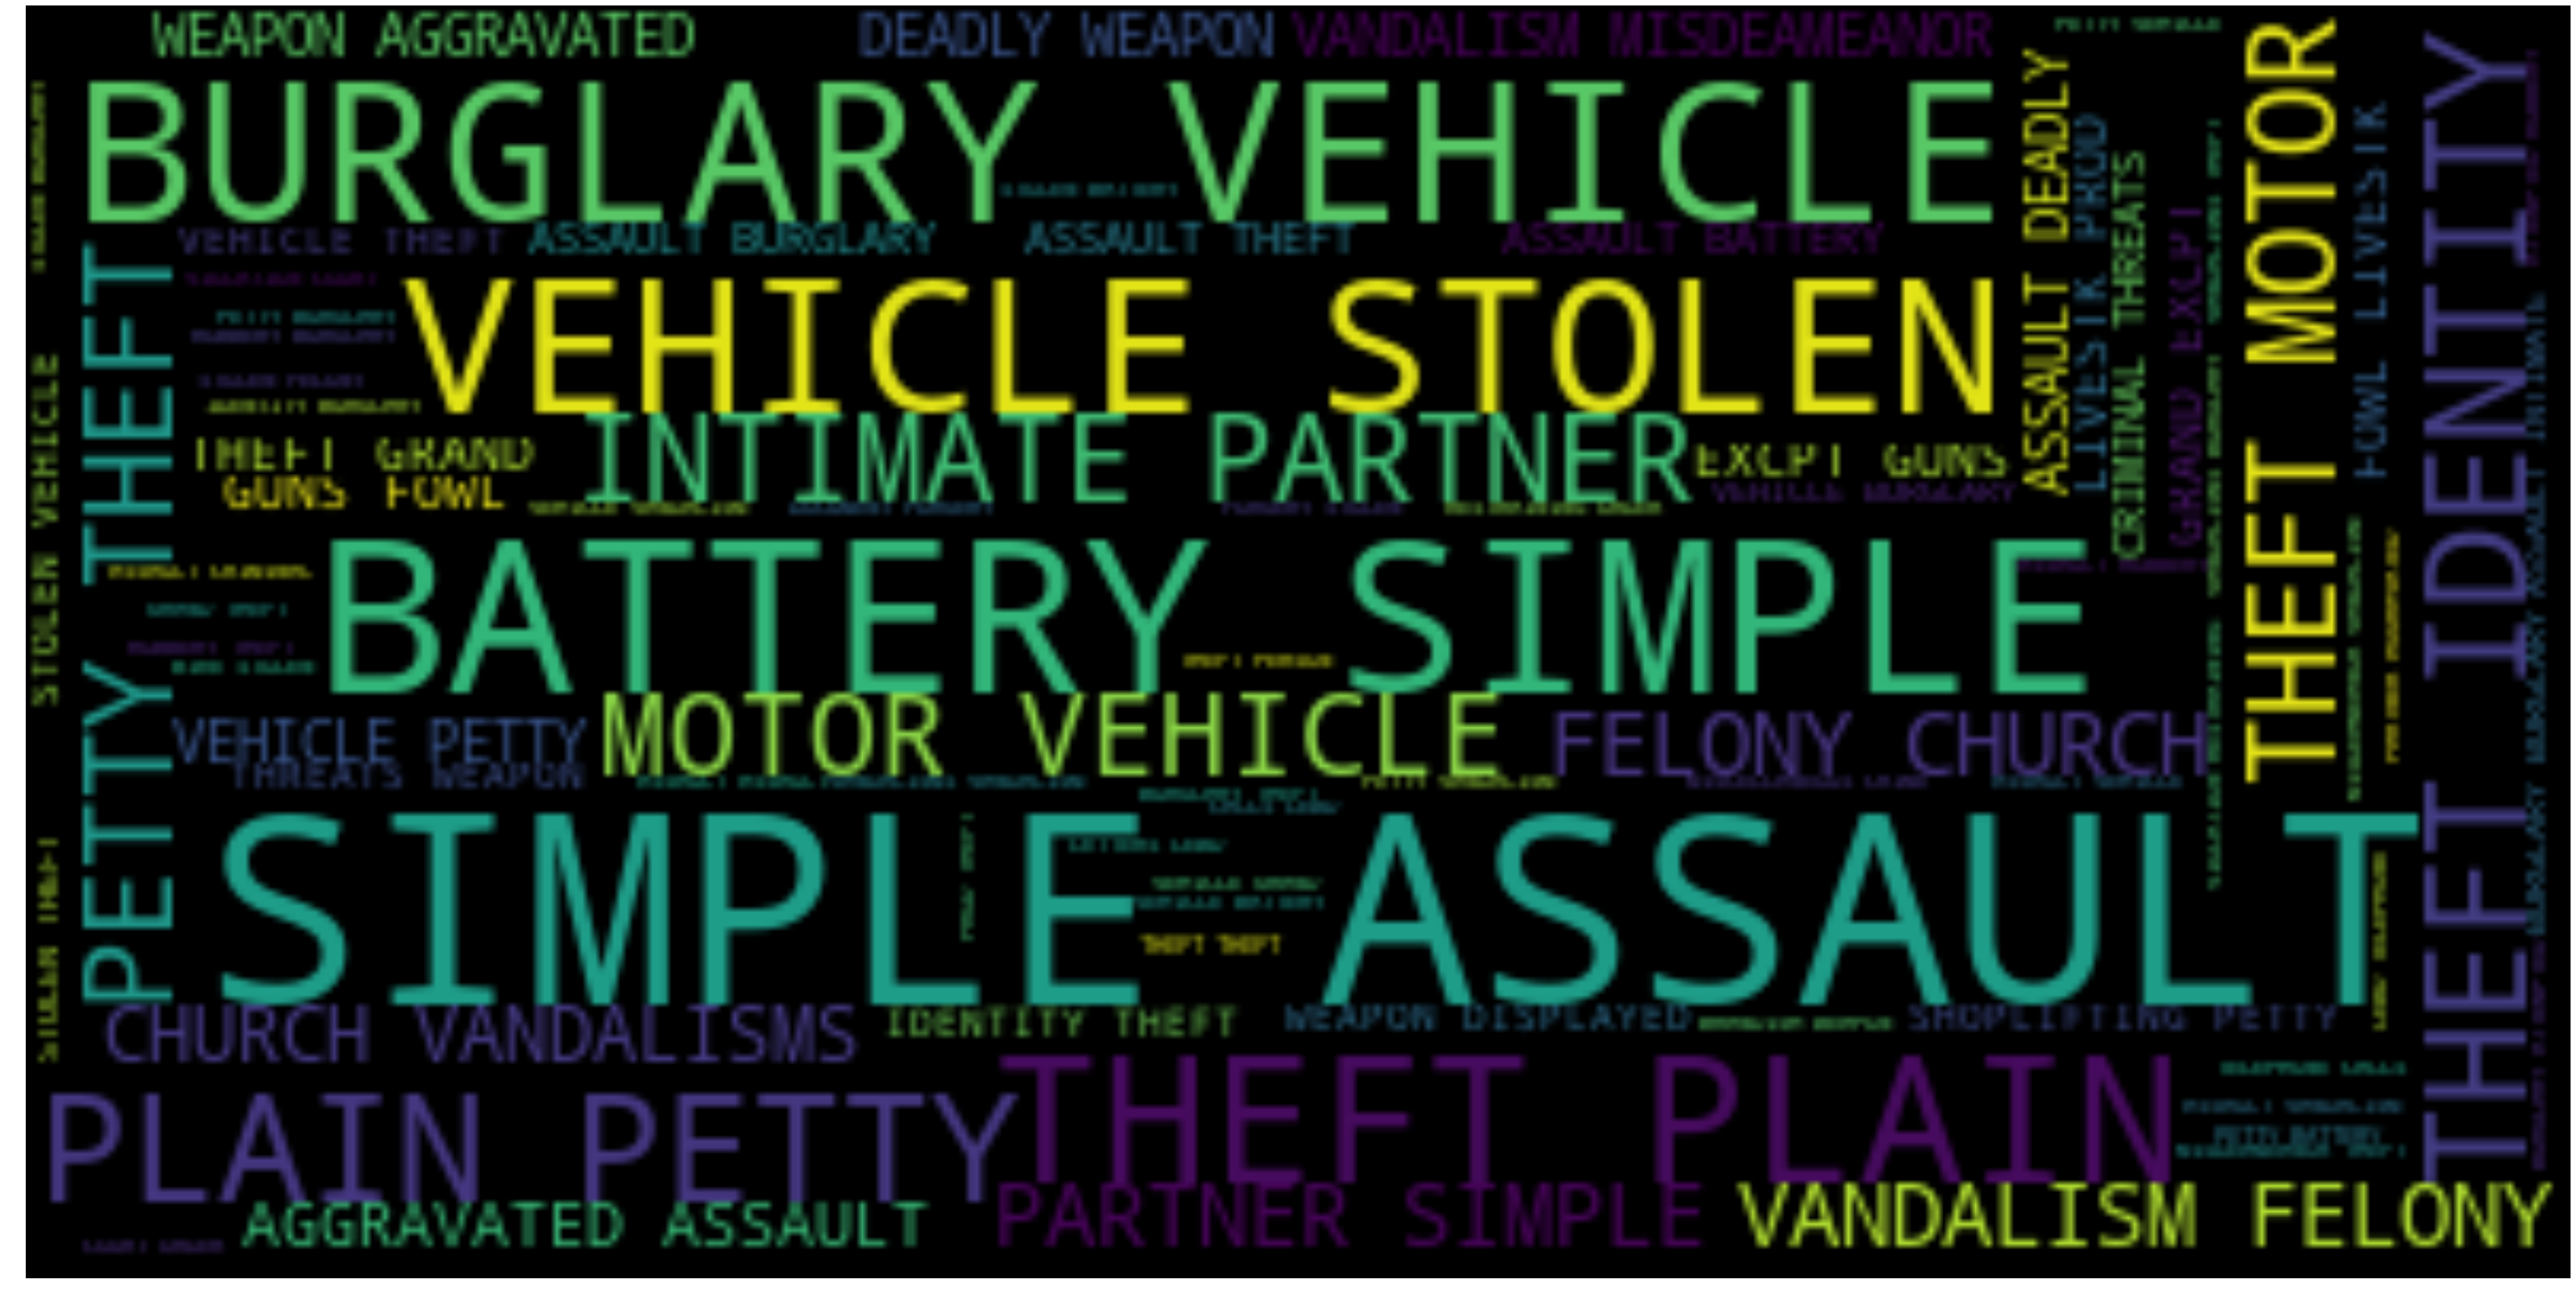

In [39]:
#Plot wordcloud image
plt.figure(figsize=[60,30])
plt.imshow(crime_desc_wordcloud_black,interpolation="bilinear")
plt.axis("off")

#Save image file
plt.savefig("Images/Crimedesc.png",format="png")

plt.show()

In [40]:
violent_crime_desc_list

,crm_cd_desc,dr_no
0,ASSAULT_WITH_DEADLY_WEAPON_AGGRAVATED_ASSAULT,81836
1,ROBBERY,75377
2,INTIMATE_PARTNER_AGGRAVATED_ASSAULT,12440
3,ATTEMPTED_ROBBERY,10780
4,BATTERY_WITH_SEXUAL_CONTACT,9966


In [41]:
violent_crime_desc_list

,crm_cd_desc,dr_no
0,ASSAULT_WITH_DEADLY_WEAPON_AGGRAVATED_ASSAULT,81836
1,ROBBERY,75377
2,INTIMATE_PARTNER_AGGRAVATED_ASSAULT,12440
3,ATTEMPTED_ROBBERY,10780
4,BATTERY_WITH_SEXUAL_CONTACT,9966


In [42]:
#Join together a single string of crime description
voilent_crime_desc_zip =[]
zip_crime_top_v_str = zip_crime_top_v
voilent_crime_desc_zip = " ".join(crimedesc for crimedesc in violent_crime_desc_list["crm_cd_desc"])
#zip_crime_top_v_str['zipcode']=  "CA_" + zip_crime_top_v_str['zipcode'].map(str)
#rows=len(zip_crime_top_v_str)
# for i in range(rows):
#     voilent_crime_desc_zip = voilent_crime_desc_zip + " " + "CA_" + rows["zipcode"].map(str)
#voilent_crime_desc_zip = " ".join(zip for zips in zip_crime_top_v_str["zipcode"])
# #Create and generate a word cloud image
voilent_crime_desc_zip_black = WordCloud().generate(voilent_crime_desc_zip)
#voilent_crime_desc_zip
#zip_crime_top_v_str

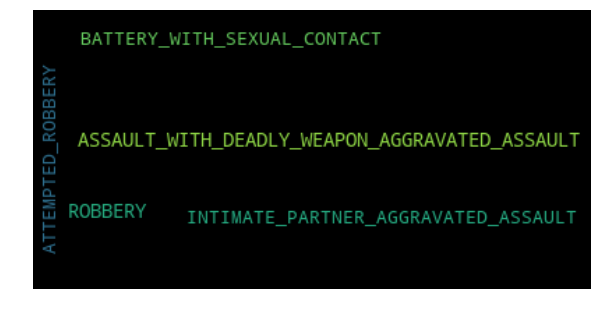

In [43]:
#Plot wordcloud image
plt.figure(figsize=[10,10])
plt.imshow(voilent_crime_desc_zip_black,interpolation="bilinear")
plt.axis("off")

#Save image file
plt.savefig("Images/Crimedesc-top5.png",format="png")

plt.show()

In [44]:
zip_crime_v.tail()

,zipcode,dr_no
164,90262,1
165,90740,1
166,90221,1
167,90805,1
168,93551,1


In [45]:
# get top into array to process zipcodes for line plot
zip_top_v = zip_crime_top_v.zipcode.unique()
zip_top_v

array([90037, 90003, 90011, 90057, 90062], dtype=int64)

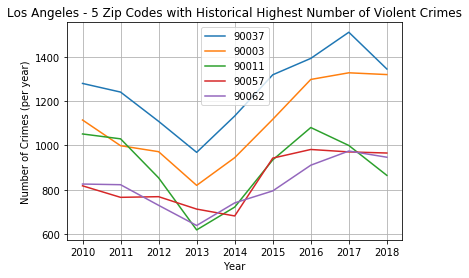

In [46]:
aggregation = { 
     'dr_no': 'nunique' 
}

zip_90037_v = violent_crime_df[violent_crime_df.zipcode == 90037].groupby(['year','zipcode']).agg(aggregation)
zip_90003_v = violent_crime_df[violent_crime_df.zipcode == 90003].groupby(['year','zipcode']).agg(aggregation)
zip_90011_v = violent_crime_df[violent_crime_df.zipcode == 90011].groupby(['year','zipcode']).agg(aggregation)
zip_90057_v = violent_crime_df[violent_crime_df.zipcode == 90057].groupby(['year','zipcode']).agg(aggregation)
zip_90062_v = violent_crime_df[violent_crime_df.zipcode == 90062].groupby(['year','zipcode']).agg(aggregation)

zip_90037_v.reset_index(level=0, inplace=True)
zip_90003_v.reset_index(level=0, inplace=True)
zip_90011_v.reset_index(level=0, inplace=True)
zip_90057_v.reset_index(level=0, inplace=True)
zip_90062_v.reset_index(level=0, inplace=True)

# plot lines
plot_90037_v = plt.plot(zip_90037_v['year'],zip_90037_v['dr_no'],label=90037)
plot_90003_v = plt.plot(zip_90003_v['year'],zip_90003_v['dr_no'],label=90003)
plot_90011_v = plt.plot(zip_90011_v['year'],zip_90011_v['dr_no'],label=90011)
plot_90057_v = plt.plot(zip_90057_v['year'],zip_90057_v['dr_no'],label=90057)
plot_90062_v = plt.plot(zip_90062_v['year'],zip_90062_v['dr_no'],label=90062)
# plot layout
plt.xlabel('Year')
plt.ylabel('Number of Crimes (per year)')
plt.title('Los Angeles - 5 Zip Codes with Historical Highest Number of Violent Crimes')
plt.legend()
plt.grid(b=None, which='major', axis='both')
# save plot
plt.savefig("Images/Los Angeles - 5 Zip Codes with Historical Highest Number of Crimes.png")
# show plot
plt.show()

### chart review:
- 2018 from the top 5 crime perspective shows a general decrease of crime
- top 5 zip code 90028 from an overall crime perspective is not in top 5 from a violent crime perspective

## Overall Violent Crime

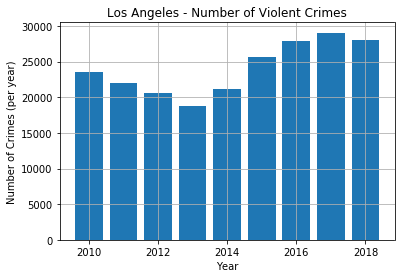

In [47]:
aggregation = { 
     'dr_no': 'nunique' 
}

overall_v = violent_crime_df.groupby(['year']).agg(aggregation)

overall_v.reset_index(level=0, inplace=True)

# plot lines
plot_overall_v = plt.bar(overall_v['year'],overall_v['dr_no'])
# plot layout
plt.xlabel('Year')
plt.ylabel('Number of Crimes (per year)')
plt.title('Los Angeles - Number of Violent Crimes')
plt.grid(b=None, which='major', axis='both')
# save plot
plt.savefig("Images/Los Angeles - Overall Number of Violent Crimes.png")
# show plot
plt.show()

In [48]:
overall_v

,year,dr_no
0,2010,23571
1,2011,21999
2,2012,20585
3,2013,18722
4,2014,21191
5,2015,25586
6,2016,27943
7,2017,29045
8,2018,27991


In [49]:
vc_2018vs2017 = (( overall_v['dr_no'][8] / overall_v['dr_no'][7]  ) - 1 ) * 100
vc_2018vs2017

-3.6288517817180233

### chart review:
- 2018 versus 2017 from an overall violent crime perspective: from 29,045 to 27,991: decrease of 3.63 %
        
  In line with article 27,246 for 2018 and a decrease of near to 4 %

  article: https://www.latimes.com/local/lanow/la-me-lapd-crime-stats-20181229-story.html
            
- Note: additional analysis done on reporting in 2015 showing inaccurate / underreporting of violent crimes
    
  article: 
    
    https://www.latimes.com/local/cityhall/la-me-crime-stats-20151015-story.html
    
    https://github.com/datadesk/lapd-crime-classification-analysis
        
- Note: changing perceptions on use and distribution of drugs and legalization can impact numbers

# Overall Violent Crime by Zip Code

In [50]:
aggregation = { 
     'dr_no': 'nunique' 
}

zipcode_hist_v = violent_crime_df.groupby(['zipcode']).agg(aggregation)
zipcode_hist_v = zipcode_hist_v.sort_values(by=['dr_no'], ascending=True)
zipcode_hist_v.reset_index(level=0, inplace=True)


In [51]:
total_v =  zipcode_hist_v.sum(axis = 0, skipna = True).dr_no

In [52]:
zipcode_hist_v['perc'] = zipcode_hist_v['dr_no'] / total_v * 100
zipcode_hist_v = zipcode_hist_v.sort_values(by=['dr_no'], ascending=False)
zipcode_hist_v.reset_index(level=0, inplace=True)

# zipcode_hist_v

In [53]:
len(zipcode_hist_v)
total_10perc = 0
total_20perc = 0
i_10 = int(len(zipcode_hist_v) * 10 / 100) #10 %
i_20 = int(len(zipcode_hist_v) * 20 / 100) #20 %
counter=0
for index, row in zipcode_hist_v.iterrows():
    if counter < i_10:
        total_10perc = total_10perc + row.perc            
    if counter < i_20:
        total_20perc = total_20perc + row.perc
    counter = counter + 1

In [54]:
print(total_10perc)
print(total_20perc)

43.65678359252746
65.1872060120111


### Number Review
- the top 10 % of the zip codes account for 43.66 % of violent crime
- the top 20 % of the zip codes account for 65.19 % of violent crime

## Violent Crime Victim Gender

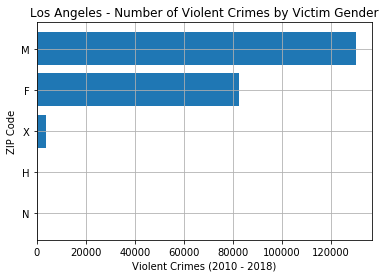

In [55]:
aggregation = { 
     'dr_no': 'nunique' 
}

vict_sex_hist_v = violent_crime_df.groupby(['vict_sex']).agg(aggregation)
vict_sex_hist_v = vict_sex_hist_v.sort_values(by=['dr_no'], ascending=True)
vict_sex_hist_v.reset_index(level=0, inplace=True)

# plot lines
plot_vict_sex_hist_v = plt.barh( vict_sex_hist_v['vict_sex'], vict_sex_hist_v['dr_no'] )
# plot layout
plt.xlabel('Violent Crimes (2010 - 2018)')
plt.ylabel('ZIP Code')
plt.title('Los Angeles - Number of Violent Crimes by Victim Gender')
plt.grid(b=None, which='major', axis='both')
# save plot
plt.savefig("Images/Los Angeles - Number of Violent Crimes by Victim Gender.png")
# show plot
plt.show()

In [56]:
total_vict_sex_v =  vict_sex_hist_v.sum(axis = 0, skipna = True).dr_no
vict_sex_hist_v['perc'] = vict_sex_hist_v['dr_no'] / total_vict_sex_v * 100

vict_sex_hist_v

,vict_sex,dr_no,perc
0,N,1,0.000462
1,H,14,0.006466
2,X,3636,1.679198
3,F,82641,38.165721
4,M,130240,60.148154


### Chart and Numbers Review
- expectation was to see a higher percentage of female victim violent crime, but graph and table show a 60.15% male victim of violent crime rate.

## Violent Crime Victim Descent

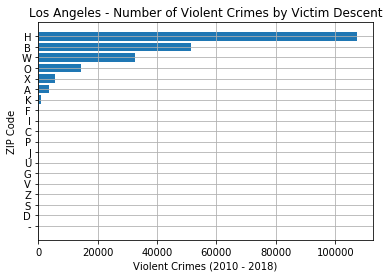

In [57]:
aggregation = { 
     'dr_no': 'nunique' 
}

vict_descent_hist_v = violent_crime_df.groupby(['vict_descent']).agg(aggregation)
vict_descent_hist_v = vict_descent_hist_v.sort_values(by=['dr_no'], ascending=True)
vict_descent_hist_v.reset_index(level=0, inplace=True)

# plot lines
plot_vict_descent_hist_v = plt.barh( vict_descent_hist_v['vict_descent'], vict_descent_hist_v['dr_no'] )
# plot layout
plt.xlabel('Violent Crimes (2010 - 2018)')
plt.ylabel('ZIP Code')
plt.title('Los Angeles - Number of Violent Crimes by Victim Descent')
plt.grid(b=None, which='major', axis='both')
# save plot
plt.savefig("Images/Los Angeles - Number of Violent Crimes by Victim Descent.png")
# show plot
plt.show()

In [58]:
total_vict_descent_v =  vict_descent_hist_v.sum(axis = 0, skipna = True).dr_no
vict_descent_hist_v['perc'] = vict_descent_hist_v['dr_no'] / total_vict_descent_v * 100

vict_descent_hist_v

,vict_descent,dr_no,perc
0,-,1,0.000462
1,D,1,0.000462
2,S,4,0.001847
3,Z,8,0.003695
4,V,10,0.004618
5,G,12,0.005542
6,U,14,0.006466
7,J,15,0.006928
8,P,19,0.008775
9,C,49,0.022630


### Chart and Numbers Review
- expected hispanic / black victims to be close: 49.56 % of violent crime victims are of hispanic descent

## Property Values and Median Income

In [59]:
zip_income_housing_intermediate = processing_df.sort_values(by=['zipcode'])
aggregation = { 
     'dr_no': 'count', 'Median Household Income': 'min','Median Home Value': 'min'
}
zip_income_housing = zip_income_housing_intermediate.groupby(['zipcode']).agg(aggregation)
zip_income_housing = zip_income_housing.sort_values(by=['dr_no'], ascending=False)
zip_income_housing.reset_index(level=0, inplace=True)
zip_income_housing.head()

,zipcode,dr_no,Median Household Income,Median Home Value
0,90037,56234,26796.0,271400.0
1,90003,50984,29686.0,231700.0
2,90028,50792,30953.0,593900.0
3,90011,43418,30171.0,269300.0
4,90057,42240,28035.0,282600.0


In [60]:
processing_df.head() 

,Unnamed: 0,area_id,area_name,crm_cd,crm_cd_desc,date_occ,date_rptd,dr_no,location,location_1,mocodes,premis_cd,premis_desc,rpt_dist_no,status,status_desc,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd,lat,lon,zipcode,year,Median Home Value,Median Household Income
0,0,7.0,Wilshire,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-12T00:00:00.000,2010-03-12T00:00:00.000,100700660,7600 BEVERLY BL,"{'type': 'Point', 'coordinates': [-118.3555, 3...",0421,109.0,PARK/PLAYGROUND,724,AA,Adult Arrest,1050,41.0,B,M,VERBAL THREAT,511.0,34.0761,-118.3555,90036,2010,945000.0,71589.0
1,1,7.0,Wilshire,626,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-13T00:00:00.000,2010-03-13T00:00:00.000,100700661,600 S DETROIT ST,"{'type': 'Point', 'coordinates': [-118.3451, 3...",0400 2000,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",735,AA,Adult Arrest,600,27.0,O,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0649,-118.3451,90036,2010,945000.0,71589.0
2,2,7.0,Wilshire,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-23T00:00:00.000,2010-03-24T00:00:00.000,100700688,LA CIENEGA BL,"{'type': 'Point', 'coordinates': [-118.3765, 3...",0400 0416 0421 1402,108.0,PARKING LOT,721,AA,Adult Arrest,2350,20.0,H,F,VERBAL THREAT,511.0,34.0730,-118.3765,90048,2010,941100.0,72701.0
3,3,7.0,Wilshire,626,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-23T00:00:00.000,2010-03-24T00:00:00.000,100700689,1100 NORTON AV,"{'type': 'Point', 'coordinates': [-118.3219, 3...",0400 0416 2000,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",759,AA,Adult Arrest,2330,35.0,O,M,UNKNOWN WEAPON/OTHER WEAPON,500.0,34.0516,-118.3219,90005,2010,633600.0,31893.0
4,4,7.0,Wilshire,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,2010-04-05T00:00:00.000,2010-04-05T00:00:00.000,100700719,4400 W WASHINGTON BL,"{'type': 'Point', 'coordinates': [-118.3353, 3...",0400 0416 2000,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",787,AO,Adult Other,2000,43.0,K,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,34.0399,-118.3353,90019,2010,617300.0,42043.0


## Are the top crime changing?

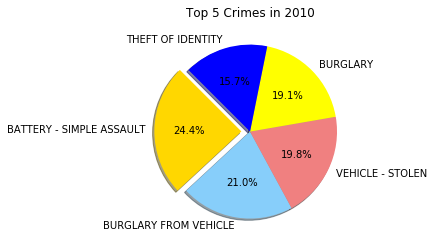

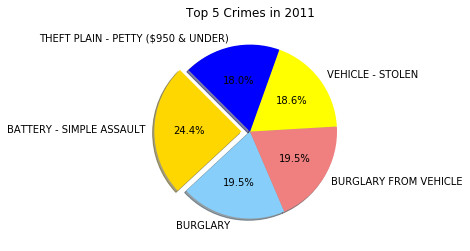

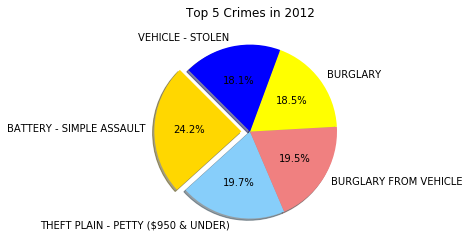

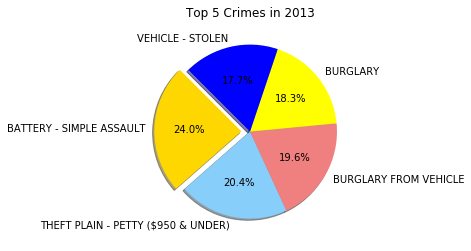

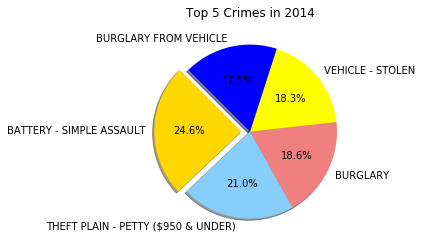

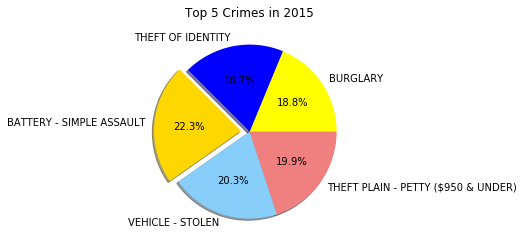

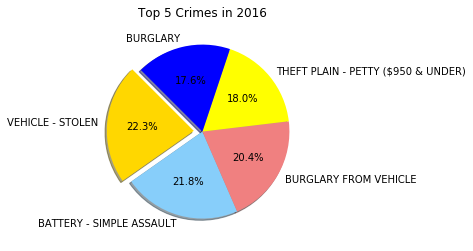

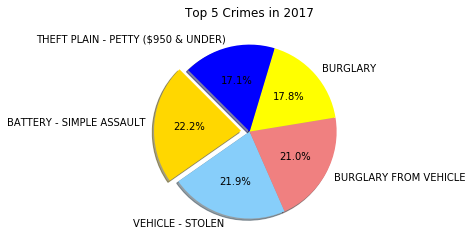

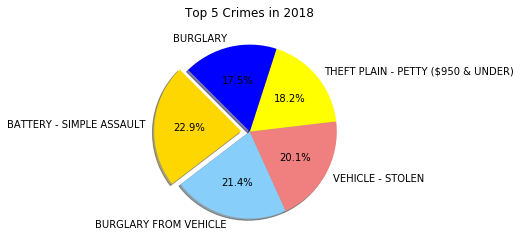

In [76]:
# Calculate Top five crimes per year
crimes_per_year_desc_intermediate = processing_df.sort_values(by=["year","crm_cd_desc"])
aggregation = { 
     "dr_no": 'count' 
}
explode = (0.1,0, 0,0,0)
colors=["Gold","LightSkyBlue","LightCoral","Yellow","Blue"]
crimes_per_year_desc = crimes_per_year_desc_intermediate.groupby(["year","crm_cd_desc"]).agg(aggregation)
crimes_per_year_desc.reset_index(level=0, inplace=True)
for i in range(2010,2019):
    data_year = i
    crimes_per_year_desc_year = crimes_per_year_desc[crimes_per_year_desc.year == data_year].sort_values(by=["dr_no"], ascending=False)
    top_crimes_per_year_desc =crimes_per_year_desc_year.head(5)
    plt.pie(top_crimes_per_year_desc.dr_no, labels = top_crimes_per_year_desc.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 135)       
    plt.title(f"Top 5 Crimes in {data_year}")
    #Save Figure
    plt.savefig(f"Images/Top 5 Crimes in {data_year}.png", bbox_inches="tight")
    plt.show()

## Is It Safe to Live in Los Angeles?

In [ ]:
# Top Crime on Longitude and Latitude
plt.scatter(results_df['lon'][results_df['crm_cd_desc']=='ASSAULT WITH DEADLY WEAPON AGGRAVATED ASSAULT'], results_df['lat'][results_df['crm_cd_desc']=='ASSAULT WITH DEADLY WEAPON AGGRAVATED ASSAULT'], s=50, alpha=0.3, color=[0.0,1.0,1.0], lw=0, label='ASSAULT WITH DEADLY WEAPON AGGRAVATED ASSAULT')
plt.scatter(results_df['lon'][results_df['crm_cd_desc']=='ROBBERY'], results_df['lat'][results_df['crm_cd_desc']=='ROBBERY'], s=50, alpha=0.5, color='g', lw=0, label='ROBBERY')
plt.scatter(results_df['lon'][results_df['crm_cd_desc']=='INTIMATE PARTNER AGGRAVATED ASSAULT'], results_df['lat'][results_df['crm_cd_desc']=='INTIMATE PARTNER AGGRAVATED ASSAULT'], s=50, alpha=0.3, color='b', lw=0, label='INTIMATE PARTNER AGGRAVATED ASSAULT')
plt.scatter(results_df['lon'][results_df['crm_cd_desc']=='ATTEMPTED ROBBERY'], results_df['lat'][results_df['crm_cd_desc']=='ATTEMPTED ROBBERY'], s=50, alpha=0.3, color='r', lw=0, label='ATTEMPTED ROBBERY')
plt.scatter(results_df['lon'][results_df['crm_cd_desc']=='BATTERY WITH SEXUAL CONTACT'], results_df['lat'][results_df['crm_cd_desc']=='BATTERY WITH SEXUAL CONTACT'], s=50, alpha=0.3, color='r', lw=0, label='BATTERY WITH SEXUAL CONTACT')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# # Save Figure
plt.savefig(f"Images/Top Crime on Longitude Latitude axes.png", bbox_inches="tight")
plt.show()

In [ ]:
#processing_df.reset_index(drop=True)
processing_df.head(5)

## Are Some Months/Days Safer for Los Angeles Residents?

In [ ]:
if "new_date_column" in processing_df.columns:
    processing_df.drop(columns=["new_date_column"])
if "day_of_week" in processing_df.columns:
    processing_df.drop(columns=["day_of_week"])
pd.options.mode.chained_assignment = None
processing_df["date_occ"]= pd.to_datetime(processing_df["date_occ"], errors="ignore")
processing_df["new_date_column"]= pd.to_datetime(processing_df["date_occ"], format="%Y%m%d", errors="ignore")
processing_df.index = pd.DatetimeIndex(processing_df["new_date_column"])

processing_df["day_of_week"] = processing_df["new_date_column"].dt.day_name()
processing_df.head()

#make graph of crimes per month
processing_df.groupby([processing_df.index.month]).size().plot.bar()
plt.title("Crime Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes Acts")
plt.savefig(f"Images/Crime Per Month.png", bbox_inches="tight")
plt.show()
# #graph of crimes per day
processing_df.groupby([processing_df.index.weekday]).size().plot.bar()
plt.title("Crime Per WeekDay Of Month")
plt.xlabel("WeekDay")
#plt.legend(f"{processing_df.index.weekday}-{processing_df.index.weekday}")
plt.ylabel("Number of Crimes Acts")
plt.savefig(f"Images/Crime Per WeekDay Of Month.png", bbox_inches="tight")
plt.show()

In [ ]:
#Calculating no of crimes per year
year_list = [2017, 2018]
no_of_crimes_intermediate = processing_df[processing_df["year"].isin(year_list)] 
aggregation = { 
     'dr_no': 'count' 
}
no_of_crimes = no_of_crimes_intermediate.groupby(["year"]).agg(aggregation)
# no_of_crimes_2017 = no_of_crimes.sort_values(by=['dr_no'], ascending=False)
no_of_crimes.reset_index(level=0, inplace=True)
no_of_crimes

## Which zip codes not to live in LA?

In [ ]:
# Use google maps api
with open('apikey.txt') as f:
    api_key = f.readline()
    f.close
gmaps.configure(api_key=api_key) 
los_angeles_coordinates = (34.0522, -118.2437) # Fill in with your API key
# #Get the locations from the data set
locations = processing_df[processing_df.year == 2018][["lat", "lon"]]
# #Get the magnitude from the data
weights = processing_df[processing_df.year == 2018]["dr_no"]
# #Set up your map
fig = gmaps.figure(center=los_angeles_coordinates, zoom_level=10)
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig
#plt.savefig(f"Images/Peace Discruption-HeatMap-2018.png")

## Crime Rates vs. Median Income/Home Values

In [ ]:
results_df.head()

In [ ]:
# plot number of crime reports over housing values
mhv = results_df["Median Home Value"]
plt.hist(mhv, bins = 11)
plt.xlabel("Median Home Value")
plt.ylabel("Number of Crime Reports")
plt.title('Crime Reports by Median Home Value')
plt.show()

In [ ]:
# Create subsets of dataframe by gender (female, male, unspecified/nongendered)
f_df = results_df.loc[results_df["vict_sex"] == "F"]
m_df = results_df.loc[results_df["vict_sex"] == "M"]
nongendered = ["X", "H", "N", "-"]
x_df = results_df.loc[results_df["vict_sex"].isin(nongendered)]

# Plot crime reports over home values by gender
f_mhv = f_df["Median Home Value"]
m_mhv = m_df["Median Home Value"]
x_mhv = x_df["Median Home Value"]

legend = ["Female", "Male", "Nongendered"]
plt.hist([f_mhv, m_mhv, x_mhv], color=["magenta", "blue", "yellow"])
plt.xlabel("Median Home Value")
plt.ylabel("Number of Crime Reports")
plt.title('Crime Reports Over Median Home Value by Gender')
plt.legend(legend)
plt.show()

In [ ]:
# Create subsets of dataframe by time of day (early morning, morning, afternoon, night)
early_df = results_df.loc[results_df["time_occ"] <= 599]

morn_df_temp = results_df.loc[results_df["time_occ"] <= 1199]
morn_df = morn_df_temp.loc[morn_df_temp["time_occ"] >= 600]

after_df_temp = results_df.loc[results_df["time_occ"] <= 1799]
after_df = after_df_temp.loc[after_df_temp["time_occ"] >= 1200]

late_df = results_df.loc[results_df["time_occ"] >= 1800]

# Plot crime reports over home values by gender
early_mhv = early_df["Median Home Value"]
morn_mhv = morn_df["Median Home Value"]
after_mhv = after_df["Median Home Value"]
late_mhv = late_df["Median Home Value"]

legend = ["Midnight-6am", "6am-Noon", "Noon-6pm", "6pm-Midnight"]
plt.hist([early_mhv, morn_mhv, after_mhv, late_mhv], color=["blue", "purple", "red", "orange"])
plt.xlabel("Median Home Value")
plt.ylabel("Number of Crime Reports")
plt.title('Crime Reports Over Median Home Value by Time of Day ')
plt.legend(legend)
plt.show()

In [ ]:
# plot number of crime reports over housing values
mhi = results_df["Median Household Income"]
plt.hist(mhi, bins = 10, color = "green")
plt.xlabel("Median Household Income")
plt.ylabel("Number of Crime Reports")
plt.title("Crime Reports by Median Household Income")
plt.show()

In [ ]:
# Plot crime reports over income by gender
f_mhi = f_df["Median Household Income"]
m_mhi = m_df["Median Household Income"]
x_mhi = x_df["Median Household Income"]

legend = ["Female", "Male", "Nongendered"]
plt.hist([f_mhi, m_mhi, x_mhi], color=["magenta", "blue", "yellow"])
plt.xlabel("Median Household Income")
plt.ylabel("Number of Crime Reports")
plt.title('Crime Reports Over Median Household Income by Gender')
plt.legend(legend)
plt.show()

In [ ]:
# Create subsets of income dataframe by time of day (early morning, morning, afternoon, night)
early_mhi = early_df["Median Household Income"]
morn_mhi = morn_df["Median Household Income"]
after_mhi = after_df["Median Household Income"]
late_mhi = late_df["Median Household Income"]

# Plot 
legend = ["Midnight-6am", "6am-Noon", "Noon-6pm", "6pm-Midnight"]
plt.hist([early_mhi, morn_mhi, after_mhi, late_mhi], color=["gold", "green", "blue", "purple"])
plt.xlabel("Median Household Income")
plt.ylabel("Number of Crime Reports")
plt.title('Crime Reports Over Median Household Income by Time of Day ')
plt.legend(legend)
plt.show()